# Training and Evaluating Drug Classification Model
In this part, we will experiment with creating Python code that processes data and trains a model using a scikit-learn pipeline. We will then evaluate it and save the results and model.


## Loading the Dataset
We will use pandas to load our CSV file, shuffle it using the sample function, and display the top three rows.

In [ ]:
import pandas as pd

drug_df = pd.read_csv("Data/drug200.csv")
drug_df = drug_df.sample(frac=1) # Shuffle all rows randomly
drug_df.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
118,32,F,HIGH,NORMAL,10.292,drugA
156,31,M,HIGH,NORMAL,11.227,drugA
81,64,M,NORMAL,HIGH,7.761,drugX


In [8]:
drug_df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

# Train Test Split
Create a dependent variable and an independent variable. Then split them into training and testing sets. This will help you to evaluate the performance of your model.

In [3]:
from sklearn.model_selection import train_test_split

X = drug_df.drop("Drug", axis=1).values
y = drug_df.Drug.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=125
)

# Machine Learning Pipelines
We will build a processing pipeline using ColumnTransformer, which will convert categorical values into numbers, fill in missing values, and scale the numerical columns.

After that, we'll create a training pipeline that will take the transformed data and train a random forest classifier.

Finally, we'll train the model.

By using pipelines, we can ensure reproducibility, modularity, and clarity in our code.

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

cat_col = [1,2,3]
num_col = [0,4]

transform = ColumnTransformer(
    [
        ("encoder", OrdinalEncoder(), cat_col),
        ("num_imputer", SimpleImputer(strategy="median"), num_col),
        ("num_scaler", StandardScaler(), num_col), #Scales features to have mean=0 and std=1 
        # Before: Age=[20, 60, 40] (range 40), Sodium=[0.8, 0.9, 0.7] (range 0.2)
        # After:  Both features have similar scales, preventing age from dominating
    ]
)
pipe = Pipeline(
    steps=[
        ("preprocessing", transform),
        ("model", RandomForestClassifier(n_estimators=100, random_state=125)),
    ]
)
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=125))])

## Model Evaluation
Evaluate the performance of the model by calculating both the accuracy and F1 score.



In [6]:
from sklearn.metrics import accuracy_score, f1_score

predictions = pipe.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="macro")

print("Accuracy:", str(round(accuracy, 2) * 100) + "%", "F1:", round(f1, 2))

Accuracy: 90.0% F1: 0.85


Create the metrics file and save it in the Results folder.

In [ ]:
with open("Results/metrics.txt", "w") as outfile:
    outfile.write(f"\nAccuracy = {accuracy.round(2)}, F1 Score = {f1.round(2)}.")

We will then create the confusion matrix and save the image file into the Results folder.

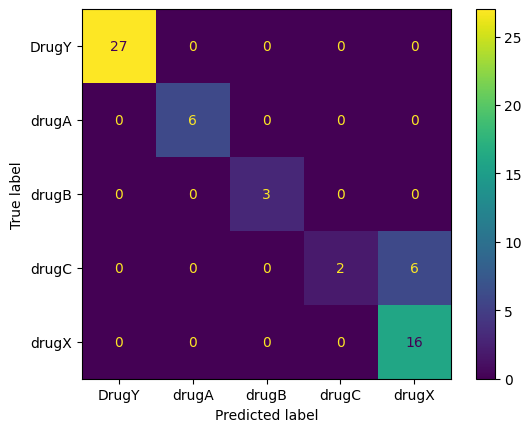

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, predictions, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot()
plt.savefig("Results/model_results.png", dpi=120)

## Saving the Model
We will now save our model using the skops Python package. This will help us save both the scikit-learn pipeline and model.


In [10]:
import skops.io as sio

sio.dump(pipe, "Model/drug_pipeline.skops")

You can just load the entire pipeline, and it will work out of the box without processing your data or making edits to the code.

In [16]:
# Try to get untrusted types using the file parameter
untrusted_types = sio.get_untrusted_types(file="Model/drug_pipeline.skops")
print(f"Untrusted types: {untrusted_types}")

# Load with those types
sio.load("Model/drug_pipeline.skops", trusted=untrusted_types)


Untrusted types: ['numpy.dtype']


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=125))])